In [8]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

We load the MNIST dataset.

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [25]:
X, y = mnist['data'].values, mnist['target'].values.astype(np.uint8)
print(f'Data: {X.shape}', f'Labels : {y.shape}', sep='\n')

Data: (70000, 784)
Labels : (70000,)


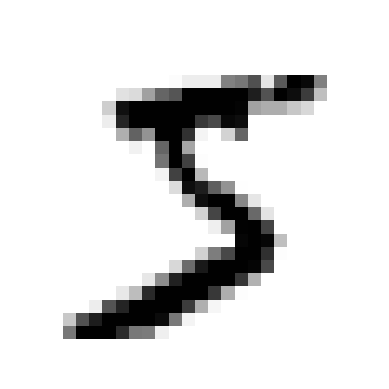

5


In [66]:
plt.imshow(X[0].reshape(28, 28), cmap='binary')
plt.axis("off")
plt.show()
print(y[0])

We split the dataset and then focus on a binary classification problem (5 or not 5)

In [28]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

In [29]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

We'll try with a Stochastic Gradient Descent (SGD) classifier.

In [32]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [35]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [36]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

$$\text{Precision = } \frac{TP}{TP + FP}$$
$$\text{Recall = } \frac{TP}{TP + FN}$$

In [38]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_train_5, y_train_pred)

In [45]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
print(f'Precision: {round(precision*100, ndigits=1)}%', f'Recall: {round(recall*100, ndigits=1)}%', sep='\n')

Precision: 83.7%
Recall: 65.1%


When it claims an image represents a 5, it is correct only 83.7% of the time. Moreover, it only detects 65.1% of the 5s.

The F1-score is the harmonic mean of precision and recall.
$$F_1 = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}}$$

In [47]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train_5, y_train_pred)
print(f'F1 score: {round(f1*100, ndigits=1)}%')

F1 score: 73.3%


Increasing precision reduces recall, and vice versa. This is called the precision/recall trade-off.

In [48]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [49]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

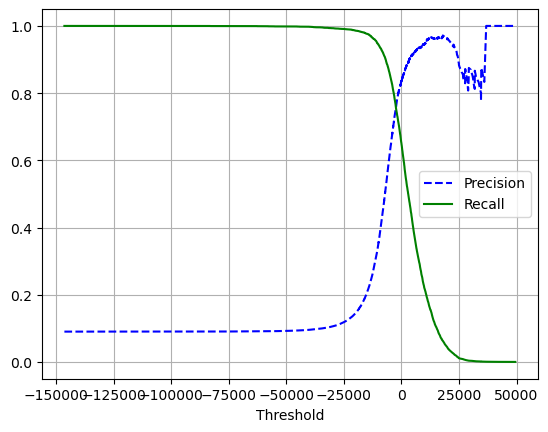

In [52]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel('Threshold')
plt.legend()
plt.grid()
plt.show()

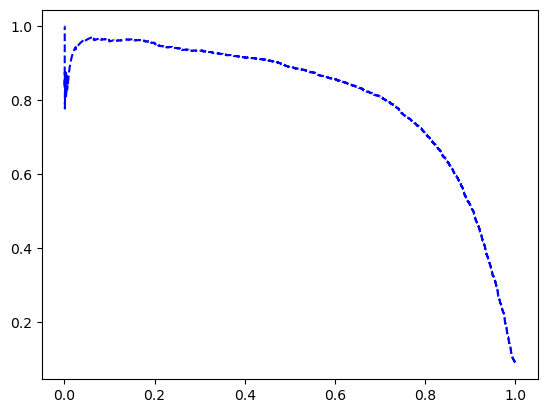

In [54]:
plt.plot(recalls[:-1], precisions[:-1], "b--", label="Precision") 

In [55]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) 

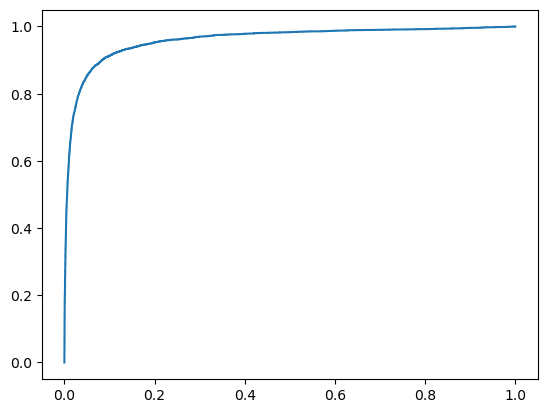

In [56]:
plt.plot(fpr, tpr)

In [57]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [58]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')
y_probas_forest

array([[0.11, 0.89],
       [0.98, 0.02],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.93, 0.07]])

In [60]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest) 

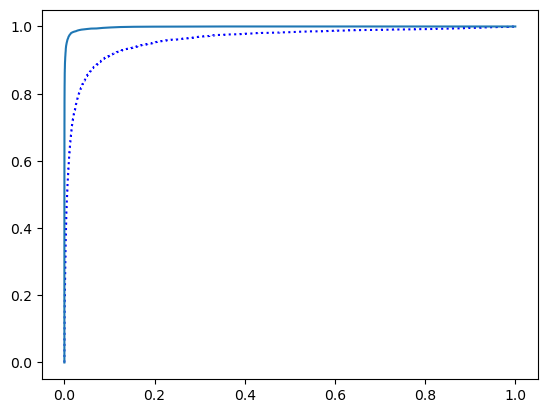

In [61]:
plt.plot(fpr, tpr, 'b:', label="SGD")
plt.plot(fpr_forest, tpr_forest, label='Random Forest')
plt.show()